### Libraries

In [91]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.model_selection import train_test_split

%matplotlib inline

### Loading the Training dataset 

In [92]:
# dataset files in "./dataset_train&test/" directory
# read the dataset
file = "./dataset_train&test/weather_train.csv"
train_x = pd.read_csv(file)
train_x.info()
train_x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             15000 non-null  int64  
 1   DATE (YYYY/MM/DD)                      15000 non-null  object 
 2   MST                                    15000 non-null  object 
 3   Global CMP22 (vent/cor) [W/m^2]        15000 non-null  float64
 4   Direct sNIP [W/m^2]                    15000 non-null  float64
 5   Azimuth Angle [degrees]                15000 non-null  float64
 6   Tower Dry Bulb Temp [deg C]            15000 non-null  float64
 7   Tower Wet Bulb Temp [deg C]            15000 non-null  float64
 8   Tower Dew Point Temp [deg C]           15000 non-null  float64
 9   Tower RH [%]                           15000 non-null  float64
 10  Peak Wind Speed @ 6ft [m/s]            15000 non-null  float64
 11  Av

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm]
0,0,2020/02/22,04:11,-1.12724,-0.365968,77.66760,8.210,0.388,-12.412,19.20,1.20,300.10,817.297,0.000,0.0,0.0000,0,50.16,9.460
1,1,2020/07/25,20:10,-1.04030,0.093816,304.73416,20.140,14.855,11.955,59.29,4.45,262.40,820.184,5.334,0.0,0.0000,7,57.39,1.121
2,2,2020/09/13,04:03,-1.29707,-0.251820,68.24852,14.080,6.560,-0.940,35.17,2.45,280.20,822.653,0.000,0.0,0.0000,8,65.63,-0.050
3,3,2020/03/08,15:25,79.20020,-0.014836,237.11811,15.030,5.725,-4.575,24.36,3.70,23.07,809.641,0.000,0.0,0.1587,6,57.08,0.734
4,4,2020/11/17,19:33,-1.61485,-0.459201,271.20406,12.660,3.180,-10.220,17.37,2.70,283.80,818.717,0.000,0.0,0.0000,0,128.59,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2020/04/20,18:47,3.69585,-0.553937,286.76511,13.280,5.410,-3.090,30.95,1.20,35.00,815.183,0.000,0.0,0.0000,0,91.76,0.954
14996,14996,2020/10/12,09:00,515.44400,912.832000,131.12291,16.980,5.677,-8.323,15.55,8.20,302.50,817.411,0.000,0.0,0.2326,0,44.57,-0.277
14997,14997,2020/12/31,09:20,286.39400,872.952000,140.97204,3.642,-1.619,-10.419,31.52,0.00,0.00,812.671,0.000,0.0,0.5277,3,82.88,2.426
14998,14998,2020/06/06,00:25,-1.38846,0.064190,6.62879,23.580,11.528,1.928,24.13,3.45,242.80,813.969,0.000,0.0,0.0000,0,133.73,0.777


### Loading the Testing dataset 

In [93]:
# dataset files in "./dataset_train&test/" directory
# read the dataset
file = "./dataset_train&test/weather_test.csv"
test_x = pd.read_csv(file)
test_x.info()
test_x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             2406 non-null   int64  
 1   DATE (YYYY/MM/DD)                      2406 non-null   object 
 2   MST                                    2406 non-null   object 
 3   Global CMP22 (vent/cor) [W/m^2]        2406 non-null   float64
 4   Direct sNIP [W/m^2]                    2406 non-null   float64
 5   Azimuth Angle [degrees]                2406 non-null   float64
 6   Tower Dry Bulb Temp [deg C]            2406 non-null   float64
 7   Tower Wet Bulb Temp [deg C]            2406 non-null   float64
 8   Tower Dew Point Temp [deg C]           2406 non-null   float64
 9   Tower RH [%]                           2406 non-null   float64
 10  Peak Wind Speed @ 6ft [m/s]            2406 non-null   float64
 11  Avg 

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle
0,0,23/01/20,19:55,-0.821587,-0.197822,270.39668,0.344,-3.269,-9.469,43.43,1.95,300.70,817.643,0.000,0.0,0.0000,7,163.53
1,1,05/02/20,04:13,-0.464099,0.039564,83.18453,-15.420,-16.249,-19.649,67.07,1.20,308.30,809.469,0.000,0.0,0.0000,0,84.09
2,2,06/06/20,02:25,-1.133330,-0.009875,35.33772,22.380,11.522,3.122,28.25,1.70,214.00,813.392,0.000,0.0,0.0000,7,109.24
3,3,10/05/20,14:17,849.620000,946.128000,244.34737,14.240,6.585,-1.215,34.02,3.45,45.53,821.467,0.000,0.0,0.1844,7,156.80
4,4,11/12/20,15:41,44.193400,0.488831,230.89280,-5.580,-6.169,-7.269,86.40,1.20,15.69,812.324,0.000,1.0,0.6648,7,154.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,2401,16/11/20,21:21,-1.444170,-0.360447,292.96778,9.820,3.214,-4.886,33.41,1.70,272.00,824.536,0.000,0.0,0.0000,7,52.08
2402,2402,26/12/20,11:17,490.631000,996.863000,168.59312,14.500,3.446,-13.654,11.30,2.45,154.90,811.310,0.000,0.0,0.2381,3,75.61
2403,2403,09/04/20,00:08,-0.957105,-0.143412,1.93913,6.984,2.890,-1.610,53.41,2.70,22.43,820.148,0.000,0.0,0.0000,3,108.22
2404,2404,16/12/20,11:37,502.869000,978.244000,174.94429,4.311,-1.305,-10.505,29.84,8.70,287.10,814.018,0.000,0.0,0.6220,7,9.83


#### Function to check the output's Mean Absolute Error during validation

In [94]:
def MAE(y_out, valid_y):
    err = 0
    l = len(valid_y)
    if len(y_out) != l: 
        print("Length of the objects passed don't match.")
        return
    for i in range(l): err += np.abs(valid_y[i] - y_out[i])
    return err / l

### Primary Preprocessing

In [95]:
# drop the ID column
train_x.drop('Unnamed: 0', inplace = True, axis = 1)
test_x.drop('Unnamed: 0', inplace = True, axis = 1)

In [97]:
# 'Snow Depth [cm]' has some values negative, which is not possible
# So convert all nagative values to '0'
ReLU = lambda x: 0 if x < 0 else x

# for training dataset
train_x['Snow Depth [cm]'] = train_x['Snow Depth [cm]'].apply(ReLU)

In [98]:
# handling the "DATE (YYYY/MM/DD)" column
daysAfterMonth = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
dayOfYear = lambda month, day: daysAfterMonth[month - 2] + day if month != 1 else day

# for training dataset
train_x['DATE (YYYY/MM/DD)'] = pd.to_datetime(train_x['DATE (YYYY/MM/DD)'])
month = train_x['DATE (YYYY/MM/DD)'].dt.month
day = train_x['DATE (YYYY/MM/DD)'].dt.day

month_day = pd.DataFrame(columns = ['month', 'day'])
month_day.month = month
month_day.day = day

train_x['DATE (YYYY/MM/DD)'] = month_day.apply(lambda x: dayOfYear(x.month, x.day), axis = 1)
train_x.rename(columns = {'DATE (YYYY/MM/DD)': 'Day_of_Year'}, inplace = True)

# for testing dataset
test_x['DATE (YYYY/MM/DD)'] = pd.to_datetime(test_x['DATE (YYYY/MM/DD)'])
month = test_x['DATE (YYYY/MM/DD)'].dt.month
day = test_x['DATE (YYYY/MM/DD)'].dt.day

month_day = pd.DataFrame(columns = ['month', 'day'])
month_day.month = month
month_day.day = day

test_x['DATE (YYYY/MM/DD)'] = month_day.apply(lambda x: dayOfYear(x.month, x.day), axis = 1)
test_x.rename(columns = {'DATE (YYYY/MM/DD)': 'Day_of_Year'}, inplace = True)

In [99]:
# handling the "MST" column
def partOfDay(hour):
    hour = int(hour.split(':')[0])
    if hour in [2,3,4,5]: return 0 # dawn 
    elif hour in [6,7,8,9]: return 1 # morning
    elif hour in [10,11,12,13]: return 2 # noon
    elif hour in [14,15,16,17]: return 3 # afternoon
    elif hour in [18,19,20,21]: return 4 # evening
    else: return 5 #midnight

# for training dataset
train_x['MST'] = train_x['MST'].apply(partOfDay)
train_x.rename(columns = {'MST': 'Part_Of_Day'}, inplace = True)

# for testing dataset
test_x['MST'] = test_x['MST'].apply(partOfDay)
test_x.rename(columns = {'MST': 'Part_Of_Day'}, inplace = True)

### Splitting the Training dataset into training and validation dataset

In [100]:
# shuffle the dataset
train_x = train_x.sample(frac = 1, random_state = 2).reset_index(drop = True) 

# split into training and validation dataset and then split the outputs 
train_x, valid_x = np.array_split(train_x, [int(0.8 * len(train_x))])
valid_x = valid_x.reset_index(drop = True)
train_y = train_x.pop('Snow Depth [cm]') # split the output
valid_y = valid_x.pop('Snow Depth [cm]') # split the output

train_x

,Day_of_Year,Part_Of_Day,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle
0,235,1,222.753000,259.709000,91.92195,23.790,10.635,-0.965,19.14,0.95,45.02,820.449,0.0,0.0,0.2505,0,36.60
1,365,3,0.127750,-0.227133,241.44062,1.837,-2.200,-8.500,42.48,1.95,21.11,813.285,0.0,0.0,0.0000,4,113.08
2,208,1,467.775000,797.220000,87.29855,19.910,14.663,11.693,59.11,2.70,65.75,824.124,0.0,0.0,0.2124,1,148.00
3,6,4,-1.061650,0.000000,259.21630,2.842,-2.957,-15.157,21.68,1.45,266.20,821.015,0.0,0.0,0.0000,7,61.55
4,323,5,-1.474050,-0.222195,339.05764,5.621,1.808,-2.592,54.05,0.00,0.00,822.400,0.0,0.0,0.0000,3,8.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,170,0,-0.796517,0.207383,37.13578,11.830,9.346,7.546,74.99,0.00,0.00,820.233,0.0,0.0,0.0000,0,83.17
11996,222,3,65.783800,1.377600,277.97696,26.210,15.909,10.119,36.37,3.95,28.82,818.582,0.0,0.0,0.1543,6,40.92
11997,152,1,319.243000,771.288000,77.58285,22.510,12.275,4.975,31.93,2.95,282.20,819.157,0.0,0.0,0.2326,7,108.01
11998,175,3,9.556250,-0.992467,286.61008,23.260,12.674,5.174,30.94,13.95,279.10,815.917,0.0,0.0,0.1441,0,85.30


### Simple Linear Regression: Ordinary Least Squares (OLS)

In [109]:
model_Linear = sm.OLS(train_y, train_x)
results = model_Linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Snow Depth [cm]   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.502
Method:                 Least Squares   F-statistic:                              711.7
Date:                Sat, 26 Mar 2022   Prob (F-statistic):                        0.00
Time:                        01:48:12   Log-Likelihood:                         -29641.
No. Observations:               12000   AIC:                                  5.932e+04
Df Residuals:                   11983   BIC:                                  5.944e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Day_of_Year                              -0.0072      0.000    -27.489      0.000      -0.008      -0.007
Part_Of_Day                               0.1473      0.020      7.436      0.000       0.108       0.186
Global CMP22 (vent/cor) [W/m^2]           0.0002      0.000      0.920      0.358      -0.000       0.001
Direct sNIP [W/m^2]                      -0.0003      0.000     -1.870      0.061      -0.001    1.31e-05
Azimuth Angle [degrees]                  -0.0005      0.000     -1.476      0.140      -0.001       0.000
Tower Dry Bulb Temp [deg C]               0.5326      0.020     26.008      0.000       0.492       0.573
Tower Wet Bulb Temp [deg C]              -1.1984      0.043    -28.002      0.000      -1.282      -1.115
Tower Dew Point Temp [deg C]              0.3356      0.021     16.272      0.000       0.295       0.376
Tower RH [%]                              0.0270      0.004      7.078      0.000       0.020       0.035
Peak Wind Speed @ 6ft [m/s]              -0.1722      0.014    -12.218      0.000      -0.200      -0.145
Avg Wind Direction @ 6ft [deg from N]     0.0027      0.000     10.178      0.000       0.002       0.003
Station Pressure [mBar]                   0.0012      0.000      3.059      0.002       0.000       0.002
Precipitation (Accumulated) [mm]          0.1197      0.015      8.250      0.000       0.091       0.148
Moisture                                  1.0716      0.138      7.763      0.000       0.801       1.342
Albedo (CMP11)                            6.1306      0.173     35.402      0.000       5.791       6.470
Cloud Type                                0.0042      0.009      0.488      0.626      -0.013       0.021
Solar Zenith Angle                        0.0004      0.001      0.555      0.579      -0.001       0.002
==============================================================================
Omnibus:                     7216.399   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112836.626
Skew:                           2.607   Prob(JB):                         0.00
Kurtosis:                      17.089   Cond. No.                     6.36e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Validating the model

In [111]:
yvalid = results.predict(valid_x)
print("MAE :", MAE(yvalid, valid_y))

MAE : 1.6333767224399198


### Test Results

In [112]:
out_csv = {
    'Id': [i for i in range(len(test_x))],
    'Snow Depth [cm]': results.predict(test_x)
}

df = pd.DataFrame(out_csv)
df.to_csv('E:/projects/DSG_Beginners_Hypothesis_2022/dataset_train&test/run1.csv', index = False, encoding = 'utf-8', float_format = '%.3f')

### Removing Multicollinearity of Independent Variables (IVs)
#### By plotting Bivariate Graphs:

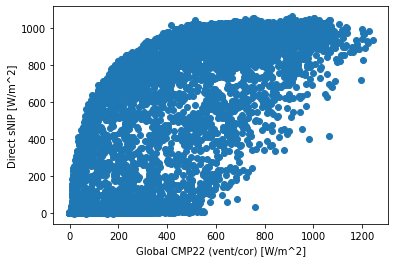

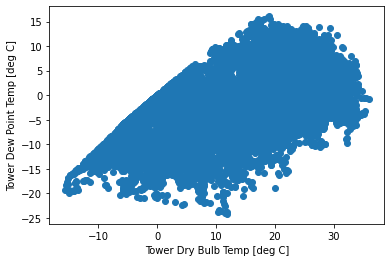

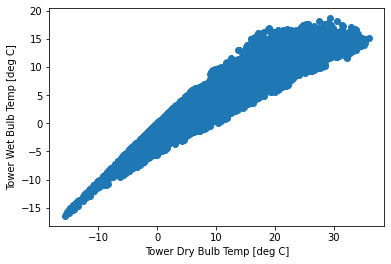

In [101]:
# trying to figure out multi-collinearity
def plot(axis_x, axis_y, data):
    plt.scatter(data[axis_x], data[axis_y])
    plt.xlabel(axis_x)
    plt.ylabel(axis_y)
    plt.show()
    plt.close()

# less correlation
plot('Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]', train_x) 
plot('Tower Dry Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]', train_x)
# highly correlated
plot('Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]', train_x)  

#### By calculating the Variance Inflation Factor (VIF)

In [102]:
def VIF(y, x):
    model = sm.OLS(y, x) # put into model 
    results = model.fit() # pass through the model
    # print(results.summary())
    rsq = results.rsquared # R^2 metric to determine the fit 
    return round(1 / (1 - rsq), 2) # VIF

def get_VIF_for_IVs(xtrain):
    df = pd.DataFrame(columns = ['Name', 'vif'])
    colNames = xtrain.columns
    vifValues = []
    for name in colNames: 
        x = xtrain.copy()
        y = x.pop(name) 
        vifValues.append(VIF(y, x))
    df.Name = colNames
    df.vif = vifValues
    print(df)

In [103]:
xtrain = train_x.copy()
get_VIF_for_IVs(xtrain)

                                     Name     vif
0                             Day_of_Year    4.40
1                             Part_Of_Day    5.26
2         Global CMP22 (vent/cor) [W/m^2]    6.86
3                     Direct sNIP [W/m^2]    6.00
4                 Azimuth Angle [degrees]    6.81
5             Tower Dry Bulb Temp [deg C]  157.18
6             Tower Wet Bulb Temp [deg C]  186.34
7            Tower Dew Point Temp [deg C]   38.95
8                            Tower RH [%]   47.31
9             Peak Wind Speed @ 6ft [m/s]    3.58
10  Avg Wind Direction @ 6ft [deg from N]    4.27
11                Station Pressure [mBar]  145.67
12       Precipitation (Accumulated) [mm]    1.20
13                               Moisture    1.74
14                         Albedo (CMP11)    2.22
15                             Cloud Type    1.70
16                     Solar Zenith Angle    5.97


In [104]:
# Few Independent variables have very high VIF
# Let's try popping them out
xtrain.drop('Tower Wet Bulb Temp [deg C]', inplace = True, axis = 1)
xtrain.drop('Station Pressure [mBar]', inplace = True, axis = 1)
xtrain.drop('Tower Dry Bulb Temp [deg C]', inplace = True, axis = 1)
get_VIF_for_IVs(xtrain)

                                     Name   vif
0                             Day_of_Year  3.41
1                             Part_Of_Day  5.14
2         Global CMP22 (vent/cor) [W/m^2]  5.98
3                     Direct sNIP [W/m^2]  5.66
4                 Azimuth Angle [degrees]  6.23
5            Tower Dew Point Temp [deg C]  1.39
6                            Tower RH [%]  4.30
7             Peak Wind Speed @ 6ft [m/s]  3.44
8   Avg Wind Direction @ 6ft [deg from N]  3.53
9        Precipitation (Accumulated) [mm]  1.16
10                               Moisture  1.51
11                         Albedo (CMP11)  2.18
12                             Cloud Type  1.67
13                     Solar Zenith Angle  5.12


In [105]:
# Results have improved drastically, still for the final time
# lets try to remove 'Global CMP22 (vent/cor) [W/m^2]' & 'Azimuth Angle [degrees]' to get all VIFs under 5
xtrain.drop('Global CMP22 (vent/cor) [W/m^2]', inplace = True, axis = 1)
xtrain.drop('Azimuth Angle [degrees]', inplace = True, axis = 1)
get_VIF_for_IVs(xtrain)

                                     Name   vif
0                             Day_of_Year  3.35
1                             Part_Of_Day  2.98
2                     Direct sNIP [W/m^2]  2.01
3            Tower Dew Point Temp [deg C]  1.28
4                            Tower RH [%]  4.29
5             Peak Wind Speed @ 6ft [m/s]  3.20
6   Avg Wind Direction @ 6ft [deg from N]  3.45
7        Precipitation (Accumulated) [mm]  1.15
8                                Moisture  1.51
9                          Albedo (CMP11)  2.13
10                             Cloud Type  1.67
11                     Solar Zenith Angle  5.00


### Simple Linear Regression: Ordinary Least Squares (OLS) after VIF check

In [106]:
model_Linear = sm.OLS(train_y, xtrain)
results = model_Linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Snow Depth [cm]   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              874.4
Date:                Sat, 26 Mar 2022   Prob (F-statistic):                        0.00
Time:                        01:41:52   Log-Likelihood:                         -30057.
No. Observations:               12000   AIC:                                  6.014e+04
Df Residuals:                   11988   BIC:                                  6.023e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Day_of_Year                              -0.0075      0.000    -32.128      0.000      -0.008      -0.007
Part_Of_Day                               0.1247      0.015      8.089      0.000       0.094       0.155
Direct sNIP [W/m^2]                      -0.0004   8.75e-05     -4.473      0.000      -0.001      -0.000
Tower Dew Point Temp [deg C]             -0.1232      0.004    -31.798      0.000      -0.131      -0.116
Tower RH [%]                              0.0415      0.001     34.840      0.000       0.039       0.044
Peak Wind Speed @ 6ft [m/s]              -0.1808      0.014    -13.109      0.000      -0.208      -0.154
Avg Wind Direction @ 6ft [deg from N]     0.0018      0.000      7.399      0.000       0.001       0.002
Precipitation (Accumulated) [mm]          0.0783      0.015      5.327      0.000       0.050       0.107
Moisture                                  1.1824      0.133      8.872      0.000       0.921       1.444
Albedo (CMP11)                            6.7329      0.175     38.380      0.000       6.389       7.077
Cloud Type                                0.0044      0.009      0.490      0.624      -0.013       0.022
Solar Zenith Angle                       -0.0004      0.001     -0.603      0.546      -0.002       0.001
==============================================================================
Omnibus:                     7502.086   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114809.118
Skew:                           2.763   Prob(JB):                         0.00
Kurtosis:                      17.109   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Validating the model

In [107]:
xvalid = valid_x.copy()
xvalid.drop(['Tower Wet Bulb Temp [deg C]', 'Station Pressure [mBar]', 'Tower Dry Bulb Temp [deg C]', 'Global CMP22 (vent/cor) [W/m^2]', 'Azimuth Angle [degrees]'], inplace = True, axis = 1)

yvalid = results.predict(xvalid)
print("MAE :", MAE(yvalid, valid_y))

MAE : 1.734519570400954


The results have deteriorated after removing IVs with high VIF.

### Test Results

In [108]:

xtest = test_x.copy()
xtest.drop(['Tower Wet Bulb Temp [deg C]', 'Station Pressure [mBar]', 'Tower Dry Bulb Temp [deg C]', 'Global CMP22 (vent/cor) [W/m^2]', 'Azimuth Angle [degrees]'], inplace = True, axis = 1)

out_csv = {
    'Id': [i for i in range(len(xtest))],
    'Snow Depth [cm]': results.predict(xtest)
}

df = pd.DataFrame(out_csv)
df.to_csv('E:/projects/DSG_Beginners_Hypothesis_2022/dataset_train&test/run0.csv', index = False, encoding = 'utf-8', float_format = '%.3f')